In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import nltk as nltk

### 1. Reading & Uploading Dataset 
---
Datset could be found [here](https://www.kaggle.com/datasets/achrafoukou/toxic-arabic-tweets-classification)

In [3]:
tweets = pd.read_csv("/content/toxic arabic tweets classification.txt", sep='\t', header=None) 
tweets.columns = ['Tweet', 'Class']
pd.set_option('display.max_colwidth',100)
tweets.head(10)

Tweet  \
0     ุงููุฒูุฑ ุฌุจุฑุงู ุจุงุณูู ุชุงุฌ ุฑุงุณู ูุง ุฌุฑุจุงู ููููุน ุจุนุฏ ุงูููู ุงููุณุงุณ ุจููุฏุณุงุชูุง ูู ุฑุจูุง ูุงูููุง ูุณูุน ุงููุณูุญ   
1              ุตุฏููู ุงูุช ุงุจู ุฌุงูุนู ุงููุนุจู ุงูุจุฑ ูู ุฏุงุนุด ุงููุนุจู ุณููู ุดูุนูุฉ ูุงุนุงุฏุฉ ุชูุฒูุน ุฏูููุบุฑุงูู ุจุณูุฑูุง   
2  ู ูุตูุญุฉ ูุจูุงู ุชุจุฏุฃ ุจุงุณุชุฎุฑุงุฌ ุงูููุท ู ุงูุบุงุฒ ูููู ุงูุดุญุงุฏุฉ ู ูุฐู ููุทุฉ ุถุนู ูุจูุงู ููุจูู ุฑูู ุณูุงุณุงุช ุงูู...   
3                                                                      ูููุฏ ุฌูุจูุงุท ูุงุชุจ ุงูุญููุฉ ูุง ูุฐุฑ    
4                                                 ุดู ุจุชูุจููู ูููุฉ ุฎูุฒูุฑ ุจุชุฌู ููุตูู ุนูู ููุงุณู ูุดููู       
5  ูุง ุฌุจุฑุงู ุจุงุณูู ูุง ูุนูู ูุง ุฑูุณ ูุง ุงุณุชุงุฐ ุจุฏู ุญุถู ุณูุฑูุง ุฑูุญ ูุนูุฏูู ูุจุฑูู ุนูู ุณููุง ูุงูุญุถู ุงููุง ุงูุญูู...   
6  ูุง ุณูุนูุง ุฌุนุงุฑูู ูุจุงุฑุญ ุนูู ุงููุตู ุงูุฅุณุฑุงุฆููู ููู ุงุบุชุตุจ ุณูุงุก ุณูุฑูุง ุ ูุจุงุญ ู ุนููู ุฌูุด ุงุจู ุดุญุงุทุฉ ูุตู ...   
7                 ูุตูุญุฉ ุงุญูู ูุน ุงูุฑุฆูุณ ููุดุงู ุนูู ุงู ูุงุฌู ุฌุจุฑุงู ุจุงุณูู ูููุงุฑ ุฏููุงุฑ ุฌุงุจู ูู ูุทุฑ ุดูุฑุง ูุทุฑ    
8                                                                                          ุตุงูู ูุง ุจูุฑ   
9                                                                    ูุง ุชุนุชุจ ุนููู ููุฏุง ุงุณูู ุงุจู ุตุฑูุงู    

     Class  
0  abusive  
1   normal  
2   normal  
3  abusive  
4  abusive  
5   normal  
6     hate  
7   normal  
8  abusive  
9  abusive

### 2. Exploring Dataset
---

In [4]:
tweets.tail()

Tweet  \
5841                                                                              ุฃููุฑ ุงููููุดูุง ูุด ุฎุงุฆู   
5842                                                                               ุตุฏูุช ููุงุณุจู ุฌุฏุง ุฌุฏุง    
5843                                                                            ูุจุฎูููู ุญุจ ุจุงุณูู ุดุบูุชูู   
5844                        ููุด ุชููุณ ุงูุฅูุงุฑุช ูุงูุณุนูุฏูุฉ ูุน ุงูุณูุฑููู ูุงููููููู ุดู ู ุฎููู ุจุตููุจู ุชูุญุณ ุจุนุถู   
5845  ูุด ุฏูุงุนุงู ุนู ุฌุจุฑุงู ุจุงุณูู ุจุณ ูุงู ูุงุฒู ุชุญุท ุงูููุทุน ุนุงูููููุฉ ุจุนุฏ ุฌููุชูู ุจุนุฏ ูุงููููุฉ ููููู ุดู ูุงู ุจุฏูุฉ   

       Class  
5841  normal  
5842  normal  
5843  normal  
5844    hate  
5845  normal

In [5]:
tweets.shape

(5846, 2)

In [6]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5846 entries, 0 to 5845
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   5846 non-null   object
 1   Class   5846 non-null   object
dtypes: object(2)
memory usage: 91.5+ KB


In [7]:
tweets.describe()

Tweet   Class
count                                                        5846    5846
unique                                                       5754       3
top     ูุฌุญูุง ุจููุชูุง ุดูุฑุงู ูุฎุงูุฉ ุงูุฑุฆูุณ ููุนุงูู ุงููุฒูุฑ ุฌุจุฑุงู ุจุงุณูู  normal
freq                                                            3    3650

In [8]:
tweets.Class.value_counts()

normal     3650
abusive    1728
hate        468
Name: Class, dtype: int64

In [9]:
tweets.Class.value_counts(normalize=True)

normal     0.624359
abusive    0.295587
hate       0.080055
Name: Class, dtype: float64

In [10]:
tweets.isnull().value_counts()

Tweet  Class
False  False    5846
dtype: int64

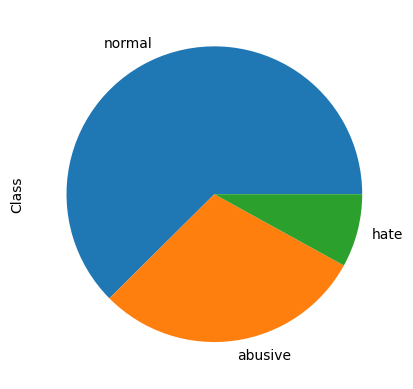

In [11]:
tweets.Class.value_counts(normalize=True).plot.pie()
plt.show()

In [12]:
copyTweetDataset = tweets.copy()
copyTweetDataset.head()

Tweet  \
0     ุงููุฒูุฑ ุฌุจุฑุงู ุจุงุณูู ุชุงุฌ ุฑุงุณู ูุง ุฌุฑุจุงู ููููุน ุจุนุฏ ุงูููู ุงููุณุงุณ ุจููุฏุณุงุชูุง ูู ุฑุจูุง ูุงูููุง ูุณูุน ุงููุณูุญ   
1              ุตุฏููู ุงูุช ุงุจู ุฌุงูุนู ุงููุนุจู ุงูุจุฑ ูู ุฏุงุนุด ุงููุนุจู ุณููู ุดูุนูุฉ ูุงุนุงุฏุฉ ุชูุฒูุน ุฏูููุบุฑุงูู ุจุณูุฑูุง   
2  ู ูุตูุญุฉ ูุจูุงู ุชุจุฏุฃ ุจุงุณุชุฎุฑุงุฌ ุงูููุท ู ุงูุบุงุฒ ูููู ุงูุดุญุงุฏุฉ ู ูุฐู ููุทุฉ ุถุนู ูุจูุงู ููุจูู ุฑูู ุณูุงุณุงุช ุงูู...   
3                                                                      ูููุฏ ุฌูุจูุงุท ูุงุชุจ ุงูุญููุฉ ูุง ูุฐุฑ    
4                                                 ุดู ุจุชูุจููู ูููุฉ ุฎูุฒูุฑ ุจุชุฌู ููุตูู ุนูู ููุงุณู ูุดููู       

     Class  
0  abusive  
1   normal  
2   normal  
3  abusive  
4  abusive

### 3. Pre-Processing 
---

1. Remove Punctuation Marks.
2. Strip vowel from a text and return a result text ุฅุฒุงูุฉ ุงูุญุฑูุงุช.
3. Strip tatweel from a text. tatweel character 'ู' is used a lot in arabic writing. for example (ูู).
4. Normalize Hamza forms into one form, for example(ุฃูุคูุงุก ูู ุฃููุฆูู >> ุงูุกูุงุก ูู ุงููุกูู ). 
5. Normalize some spelling to make text unified like, "ุฉ" into "ู" and "ุฆ" into "ู".
6. make one last column that has all normalization steps and drop the remaining columns.




In [13]:
pip install tashaphyne 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     โโโโโโโโโโโโโโโโโโโโโโโโโโโโโโโโโโโโโโโ 251.5/251.5 kB 5.3 MB/s eta 0:00:00
     โโโโโโโโโโโโโโโโโโโโโโโโโโโโโโโโโโโโโโ 126.4/126.4 kB 13.8 MB/s eta 0:00:00


In [14]:
# 1. Remove Punctuation Marks.



import string

def remove_punct(text):
  neededPunct = ['!','#','ุ','?']  # considering qustion mark both in arabic and english 
  text_nopunct = "".join([char for char in text if char not in string.punctuation or char in neededPunct ])
  return text_nopunct

tweets['Tweet Removed Punct'] = tweets['Tweet'].apply(lambda x: remove_punct(x))

import tashaphyne.normalize as ts #packge to normalize arabic text

#2. Strip vowel from a text and return a result text ุฅุฒุงูุฉ ุงูุญุฑูุงุช.
tweets['Tweet Removed tashkeel'] = tweets['Tweet Removed Punct'].apply(lambda x: 	ts.strip_tashkeel(x))

#3. Strip tatweel from a text. tatweel character 'ู' is used a lot in arabic writing. for example (ูู).
tweets['Tweet Removed tatweel'] = tweets['Tweet Removed tashkeel'].apply(lambda x: 	ts.strip_tatweel(x))

#4. Normalize Hamza forms into one form, for example(ุฃูุคูุงุก ูู ุฃููุฆูู >> ุงูุกูุงุก ูู ุงููุกูู ). 
tweets['Tweet Hamza Norm'] = tweets['Tweet Removed tatweel'].apply(lambda x: 	ts.normalize_hamza(x))

#5. Normalize some spelling to make text unified like, "ุฉ" into "ู" and "ุฆ" into "ู".
tweets['Tweet Normlised Spelling'] = tweets['Tweet Hamza Norm'].apply(lambda x: 	ts.normalize_spellerrors(x))

#6. make one last column that has all normalization steps and drop the remaining columns.
tweets['Tweet Normlised'] = tweets['Tweet Normlised Spelling']

tweets = tweets.drop(columns=["Tweet Removed Punct","Tweet Removed tashkeel", "Tweet Removed tatweel",'Tweet Hamza Norm','Tweet Normlised Spelling'])

tweets.head(5)




Tweet  \
0     ุงููุฒูุฑ ุฌุจุฑุงู ุจุงุณูู ุชุงุฌ ุฑุงุณู ูุง ุฌุฑุจุงู ููููุน ุจุนุฏ ุงูููู ุงููุณุงุณ ุจููุฏุณุงุชูุง ูู ุฑุจูุง ูุงูููุง ูุณูุน ุงููุณูุญ   
1              ุตุฏููู ุงูุช ุงุจู ุฌุงูุนู ุงููุนุจู ุงูุจุฑ ูู ุฏุงุนุด ุงููุนุจู ุณููู ุดูุนูุฉ ูุงุนุงุฏุฉ ุชูุฒูุน ุฏูููุบุฑุงูู ุจุณูุฑูุง   
2  ู ูุตูุญุฉ ูุจูุงู ุชุจุฏุฃ ุจุงุณุชุฎุฑุงุฌ ุงูููุท ู ุงูุบุงุฒ ูููู ุงูุดุญุงุฏุฉ ู ูุฐู ููุทุฉ ุถุนู ูุจูุงู ููุจูู ุฑูู ุณูุงุณุงุช ุงูู...   
3                                                                      ูููุฏ ุฌูุจูุงุท ูุงุชุจ ุงูุญููุฉ ูุง ูุฐุฑ    
4                                                 ุดู ุจุชูุจููู ูููุฉ ุฎูุฒูุฑ ุจุชุฌู ููุตูู ุนูู ููุงุณู ูุดููู       

     Class  \
0  abusive   
1   normal   
2   normal   
3  abusive   
4  abusive   

                                                                                       Tweet Normlised  
0     ุงููุฒูุฑ ุฌุจุฑุงู ุจุงุณูู ุชุงุฌ ุฑุงุณู ูุง ุฌุฑุจุงู ููููุน ุจุนุฏ ุงูููู ุงููุณุงุณ ุจููุฏุณุงุชูุง ูู ุฑุจูุง ูุงูููุง ูุณูุน ุงููุณูุญ  
1              ุตุฏููู ุงูุช ุงุจู ุฌุงูุนู ุงููุนุจู ุงูุจุฑ ูู ุฏุงุนุด ุงููุนุจู ุณููู ุดูุนูู ูุงุนุงุฏู ุชูุฒูุน ุฏูููุบุฑุงูู ุจุณูุฑูุง  
2  ู ูุตูุญู ูุจูุงู ุชุจุฏุง ุจุงุณุชุฎุฑุงุฌ ุงูููุท ู ุงูุบุงุฒ ูููู ุงูุดุญุงุฏู ู ูุฐู ููุทู ุถุนู ูุจูุงู ููุจูู ุฑูู ุณูุงุณุงุช ุงูู...  
3                                                                      ูููุฏ ุฌูุจูุงุท ูุงุชุจ ุงูุญููู ูุง ูุฐุฑ   
4                                                 ุดู ุจุชูุจููู ูููู ุฎูุฒูุฑ ุจุชุฌู ููุตูู ุนูู ููุงุณู ูุดููู

### 4. Tokenization 
---
1. tokenize white space
2. tokenize words and !, ?, #, ุ 


The addition of ` ` to the regx ensures that certain abusive and hateful language elements such as !, ?, # are not overlooked during tokenization. By including these elements as separate tokens, they can be analyzed.

In [15]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import re


def TokenizeRegx(tokenList):
  tokens = re.split(r'(\W+)', tokenList) # the regex \W+ will splits the string into tokens while preserving the non-word characters as separate tokens.
  tokens = [token for token in tokens if token.strip()] 
  return tokens


# 1. tokenize white space
tweets['Tweet Tokenize Word'] = tweets['Tweet Normlised'].apply(lambda x: word_tokenize(x)) 

# 2. tokenize words and !, ?, #, ุ 
tweets['Tweet Tokenize Regx'] = tweets['Tweet Normlised'].apply(lambda x: TokenizeRegx(x)) 

tweets.head(5)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Tweet  \
0     ุงููุฒูุฑ ุฌุจุฑุงู ุจุงุณูู ุชุงุฌ ุฑุงุณู ูุง ุฌุฑุจุงู ููููุน ุจุนุฏ ุงูููู ุงููุณุงุณ ุจููุฏุณุงุชูุง ูู ุฑุจูุง ูุงูููุง ูุณูุน ุงููุณูุญ   
1              ุตุฏููู ุงูุช ุงุจู ุฌุงูุนู ุงููุนุจู ุงูุจุฑ ูู ุฏุงุนุด ุงููุนุจู ุณููู ุดูุนูุฉ ูุงุนุงุฏุฉ ุชูุฒูุน ุฏูููุบุฑุงูู ุจุณูุฑูุง   
2  ู ูุตูุญุฉ ูุจูุงู ุชุจุฏุฃ ุจุงุณุชุฎุฑุงุฌ ุงูููุท ู ุงูุบุงุฒ ูููู ุงูุดุญุงุฏุฉ ู ูุฐู ููุทุฉ ุถุนู ูุจูุงู ููุจูู ุฑูู ุณูุงุณุงุช ุงูู...   
3                                                                      ูููุฏ ุฌูุจูุงุท ูุงุชุจ ุงูุญููุฉ ูุง ูุฐุฑ    
4                                                 ุดู ุจุชูุจููู ูููุฉ ุฎูุฒูุฑ ุจุชุฌู ููุตูู ุนูู ููุงุณู ูุดููู       

     Class  \
0  abusive   
1   normal   
2   normal   
3  abusive   
4  abusive   

                                                                                       Tweet Normlised  \
0     ุงููุฒูุฑ ุฌุจุฑุงู ุจุงุณูู ุชุงุฌ ุฑุงุณู ูุง ุฌุฑุจุงู ููููุน ุจุนุฏ ุงูููู ุงููุณุงุณ ุจููุฏุณุงุชูุง ูู ุฑุจูุง ูุงูููุง ูุณูุน ุงููุณูุญ   
1              ุตุฏููู ุงูุช ุงุจู ุฌุงูุนู ุงููุนุจู ุงูุจุฑ ูู ุฏุงุนุด ุงููุนุจู ุณููู ุดูุนูู ูุงุนุงุฏู ุชูุฒูุน ุฏูููุบุฑุงูู ุจุณูุฑูุง   
2  ู ูุตูุญู ูุจูุงู ุชุจุฏุง ุจุงุณุชุฎุฑุงุฌ ุงูููุท ู ุงูุบุงุฒ ูููู ุงูุดุญุงุฏู ู ูุฐู ููุทู ุถุนู ูุจูุงู ููุจูู ุฑูู ุณูุงุณุงุช ุงูู...   
3                                                                      ูููุฏ ุฌูุจูุงุท ูุงุชุจ ุงูุญููู ูุง ูุฐุฑ    
4                                                 ุดู ุจุชูุจููู ูููู ุฎูุฒูุฑ ุจุชุฌู ููุตูู ุนูู ููุงุณู ูุดููู       

                                                                                   Tweet Tokenize Word  \
0  [ุงููุฒูุฑ, ุฌุจุฑุงู, ุจุงุณูู, ุชุงุฌ, ุฑุงุณู, ูุง, ุฌุฑุจุงู, ููููุน, ุจุนุฏ, ุงูููู, ุงููุณุงุณ, ุจููุฏุณุงุชูุง, ูู, ุฑุจูุง, ูุงู...   
1  [ุตุฏููู, ุงูุช, ุงุจู, ุฌุงูุนู, ุงููุนุจู, ุงูุจุฑ, ูู, ุฏุงุนุด, ุงููุนุจู, ุณููู, ุดูุนูู, ูุงุนุงุฏู, ุชูุฒูุน, ุฏูููุบุฑุงูู, ...   
2  [ู, ูุตูุญู, ูุจูุงู, ุชุจุฏุง, ุจุงุณุชุฎุฑุงุฌ, ุงูููุท, ู, ุงูุบุงุฒ, ูููู, ุงูุดุญุงุฏู, ู, ูุฐู, ููุทู, ุถุนู, ูุจูุงู, ููุจู...   
3                                                                [ูููุฏ, ุฌูุจูุงุท, ูุงุชุจ, ุงูุญููู, ูุง, ูุฐุฑ]   
4                                           [ุดู, ุจุชูุจููู, ูููู, ุฎูุฒูุฑ, ุจุชุฌู, ููุตูู, ุนูู, ููุงุณู, ูุดููู]   

                                                                                   Tweet Tokenize Regx  
0  [ุงููุฒูุฑ, ุฌุจุฑุงู, ุจุงุณูู, ุชุงุฌ, ุฑุงุณู, ูุง, ุฌุฑุจุงู, ููููุน, ุจุนุฏ, ุงูููู, ุงููุณุงุณ, ุจููุฏุณุงุชูุง, ูู, ุฑุจูุง, ูุงู...  
1  [ุตุฏููู, ุงูุช, ุงุจู, ุฌุงูุนู, ุงููุนุจู, ุงูุจุฑ, ูู, ุฏุงุนุด, ุงููุนุจู, ุณููู, ุดูุนูู, ูุงุนุงุฏู, ุชูุฒูุน, ุฏูููุบุฑุงูู, ...  
2  [ู, ูุตูุญู, ูุจูุงู, ุชุจุฏุง, ุจุงุณุชุฎุฑุงุฌ, ุงูููุท, ู, ุงูุบุงุฒ, ูููู, ุงูุดุญุงุฏู, ู, ูุฐู, ููุทู, ุถุนู, ูุจูุงู, ููุจู...  
3                                                                [ูููุฏ, ุฌูุจูุงุท, ูุงุชุจ, ุงูุญููู, ูุง, ูุฐุฑ]  
4                                           [ุดู, ุจุชูุจููู, ูููู, ุฎูุฒูุฑ, ุจุชุฌู, ููุตูู, ุนูู, ููุงุณู, ูุดููู]

*italicized text*### 5. Removing Stop-words



---

In [16]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopword_ab= nltk.corpus.stopwords.words('arabic')

def remove_stopword(text):
  text_st = [word for word in text if word not in stopword_ab]
  return text_st

tweets['Tweet NoStopword'] =tweets['Tweet Tokenize Word'].apply(lambda x: remove_stopword(x))

tweets.head(5)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Tweet  \
0     ุงููุฒูุฑ ุฌุจุฑุงู ุจุงุณูู ุชุงุฌ ุฑุงุณู ูุง ุฌุฑุจุงู ููููุน ุจุนุฏ ุงูููู ุงููุณุงุณ ุจููุฏุณุงุชูุง ูู ุฑุจูุง ูุงูููุง ูุณูุน ุงููุณูุญ   
1              ุตุฏููู ุงูุช ุงุจู ุฌุงูุนู ุงููุนุจู ุงูุจุฑ ูู ุฏุงุนุด ุงููุนุจู ุณููู ุดูุนูุฉ ูุงุนุงุฏุฉ ุชูุฒูุน ุฏูููุบุฑุงูู ุจุณูุฑูุง   
2  ู ูุตูุญุฉ ูุจูุงู ุชุจุฏุฃ ุจุงุณุชุฎุฑุงุฌ ุงูููุท ู ุงูุบุงุฒ ูููู ุงูุดุญุงุฏุฉ ู ูุฐู ููุทุฉ ุถุนู ูุจูุงู ููุจูู ุฑูู ุณูุงุณุงุช ุงูู...   
3                                                                      ูููุฏ ุฌูุจูุงุท ูุงุชุจ ุงูุญููุฉ ูุง ูุฐุฑ    
4                                                 ุดู ุจุชูุจููู ูููุฉ ุฎูุฒูุฑ ุจุชุฌู ููุตูู ุนูู ููุงุณู ูุดููู       

     Class  \
0  abusive   
1   normal   
2   normal   
3  abusive   
4  abusive   

                                                                                       Tweet Normlised  \
0     ุงููุฒูุฑ ุฌุจุฑุงู ุจุงุณูู ุชุงุฌ ุฑุงุณู ูุง ุฌุฑุจุงู ููููุน ุจุนุฏ ุงูููู ุงููุณุงุณ ุจููุฏุณุงุชูุง ูู ุฑุจูุง ูุงูููุง ูุณูุน ุงููุณูุญ   
1              ุตุฏููู ุงูุช ุงุจู ุฌุงูุนู ุงููุนุจู ุงูุจุฑ ูู ุฏุงุนุด ุงููุนุจู ุณููู ุดูุนูู ูุงุนุงุฏู ุชูุฒูุน ุฏูููุบุฑุงูู ุจุณูุฑูุง   
2  ู ูุตูุญู ูุจูุงู ุชุจุฏุง ุจุงุณุชุฎุฑุงุฌ ุงูููุท ู ุงูุบุงุฒ ูููู ุงูุดุญุงุฏู ู ูุฐู ููุทู ุถุนู ูุจูุงู ููุจูู ุฑูู ุณูุงุณุงุช ุงูู...   
3                                                                      ูููุฏ ุฌูุจูุงุท ูุงุชุจ ุงูุญููู ูุง ูุฐุฑ    
4                                                 ุดู ุจุชูุจููู ูููู ุฎูุฒูุฑ ุจุชุฌู ููุตูู ุนูู ููุงุณู ูุดููู       

                                                                                   Tweet Tokenize Word  \
0  [ุงููุฒูุฑ, ุฌุจุฑุงู, ุจุงุณูู, ุชุงุฌ, ุฑุงุณู, ูุง, ุฌุฑุจุงู, ููููุน, ุจุนุฏ, ุงูููู, ุงููุณุงุณ, ุจููุฏุณุงุชูุง, ูู, ุฑุจูุง, ูุงู...   
1  [ุตุฏููู, ุงูุช, ุงุจู, ุฌุงูุนู, ุงููุนุจู, ุงูุจุฑ, ูู, ุฏุงุนุด, ุงููุนุจู, ุณููู, ุดูุนูู, ูุงุนุงุฏู, ุชูุฒูุน, ุฏูููุบุฑุงูู, ...   
2  [ู, ูุตูุญู, ูุจูุงู, ุชุจุฏุง, ุจุงุณุชุฎุฑุงุฌ, ุงูููุท, ู, ุงูุบุงุฒ, ูููู, ุงูุดุญุงุฏู, ู, ูุฐู, ููุทู, ุถุนู, ูุจูุงู, ููุจู...   
3                                                                [ูููุฏ, ุฌูุจูุงุท, ูุงุชุจ, ุงูุญููู, ูุง, ูุฐุฑ]   
4                                           [ุดู, ุจุชูุจููู, ูููู, ุฎูุฒูุฑ, ุจุชุฌู, ููุตูู, ุนูู, ููุงุณู, ูุดููู]   

                                                                                   Tweet Tokenize Regx  \
0  [ุงููุฒูุฑ, ุฌุจุฑุงู, ุจุงุณูู, ุชุงุฌ, ุฑุงุณู, ูุง, ุฌุฑุจุงู, ููููุน, ุจุนุฏ, ุงูููู, ุงููุณุงุณ, ุจููุฏุณุงุชูุง, ูู, ุฑุจูุง, ูุงู...   
1  [ุตุฏููู, ุงูุช, ุงุจู, ุฌุงูุนู, ุงููุนุจู, ุงูุจุฑ, ูู, ุฏุงุนุด, ุงููุนุจู, ุณููู, ุดูุนูู, ูุงุนุงุฏู, ุชูุฒูุน, ุฏูููุบุฑุงูู, ...   
2  [ู, ูุตูุญู, ูุจูุงู, ุชุจุฏุง, ุจุงุณุชุฎุฑุงุฌ, ุงูููุท, ู, ุงูุบุงุฒ, ูููู, ุงูุดุญุงุฏู, ู, ูุฐู, ููุทู, ุถุนู, ูุจูุงู, ููุจู...   
3                                                                [ูููุฏ, ุฌูุจูุงุท, ูุงุชุจ, ุงูุญููู, ูุง, ูุฐุฑ]   
4                                           [ุดู, ุจุชูุจููู, ูููู, ุฎูุฒูุฑ, ุจุชุฌู, ููุตูู, ุนูู, ููุงุณู, ูุดููู]   

                                                                                      Tweet NoStopword  
0  [ุงููุฒูุฑ, ุฌุจุฑุงู, ุจุงุณูู, ุชุงุฌ, ุฑุงุณู, ุฌุฑุจุงู, ููููุน, ุงูููู, ุงููุณุงุณ, ุจููุฏุณุงุชูุง, ุฑุจูุง, ูุงูููุง, ูุณูุน, ุงู...  
1  [ุตุฏููู, ุงูุช, ุงุจู, ุฌุงูุนู, ุงููุนุจู, ุงูุจุ

### 6. Stemming
---

In [17]:
	
from snowballstemmer import stemmer
ar_stemmer = stemmer("arabic")
#ar_stemmer.stemWord("ููุชุจ")

In [18]:
def stemm(stemList):
  text = [ar_stemmer.stemWord(word) for word in stemList]
  return text

tweets['Tweet Stemming'] = tweets['Tweet NoStopword'].apply(lambda x: stemm(x))

tweets.head(5)



Tweet  \
0     ุงููุฒูุฑ ุฌุจุฑุงู ุจุงุณูู ุชุงุฌ ุฑุงุณู ูุง ุฌุฑุจุงู ููููุน ุจุนุฏ ุงูููู ุงููุณุงุณ ุจููุฏุณุงุชูุง ูู ุฑุจูุง ูุงูููุง ูุณูุน ุงููุณูุญ   
1              ุตุฏููู ุงูุช ุงุจู ุฌุงูุนู ุงููุนุจู ุงูุจุฑ ูู ุฏุงุนุด ุงููุนุจู ุณููู ุดูุนูุฉ ูุงุนุงุฏุฉ ุชูุฒูุน ุฏูููุบุฑุงูู ุจุณูุฑูุง   
2  ู ูุตูุญุฉ ูุจูุงู ุชุจุฏุฃ ุจุงุณุชุฎุฑุงุฌ ุงูููุท ู ุงูุบุงุฒ ูููู ุงูุดุญุงุฏุฉ ู ูุฐู ููุทุฉ ุถุนู ูุจูุงู ููุจูู ุฑูู ุณูุงุณุงุช ุงูู...   
3                                                                      ูููุฏ ุฌูุจูุงุท ูุงุชุจ ุงูุญููุฉ ูุง ูุฐุฑ    
4                                                 ุดู ุจุชูุจููู ูููุฉ ุฎูุฒูุฑ ุจุชุฌู ููุตูู ุนูู ููุงุณู ูุดููู       

     Class  \
0  abusive   
1   normal   
2   normal   
3  abusive   
4  abusive   

                                                                                       Tweet Normlised  \
0     ุงููุฒูุฑ ุฌุจุฑุงู ุจุงุณูู ุชุงุฌ ุฑุงุณู ูุง ุฌุฑุจุงู ููููุน ุจุนุฏ ุงูููู ุงููุณุงุณ ุจููุฏุณุงุชูุง ูู ุฑุจูุง ูุงูููุง ูุณูุน ุงููุณูุญ   
1              ุตุฏููู ุงูุช ุงุจู ุฌุงูุนู ุงููุนุจู ุงูุจุฑ ูู ุฏุงุนุด ุงููุนุจู ุณููู ุดูุนูู ูุงุนุงุฏู ุชูุฒูุน ุฏูููุบุฑุงูู ุจุณูุฑูุง   
2  ู ูุตูุญู ูุจูุงู ุชุจุฏุง ุจุงุณุชุฎุฑุงุฌ ุงูููุท ู ุงูุบุงุฒ ูููู ุงูุดุญุงุฏู ู ูุฐู ููุทู ุถุนู ูุจูุงู ููุจูู ุฑูู ุณูุงุณุงุช ุงูู...   
3                                                                      ูููุฏ ุฌูุจูุงุท ูุงุชุจ ุงูุญููู ูุง ูุฐุฑ    
4                                                 ุดู ุจุชูุจููู ูููู ุฎูุฒูุฑ ุจุชุฌู ููุตูู ุนูู ููุงุณู ูุดููู       

                                                                                   Tweet Tokenize Word  \
0  [ุงููุฒูุฑ, ุฌุจุฑุงู, ุจุงุณูู, ุชุงุฌ, ุฑุงุณู, ูุง, ุฌุฑุจุงู, ููููุน, ุจุนุฏ, ุงูููู, ุงููุณุงุณ, ุจููุฏุณุงุชูุง, ูู, ุฑุจูุง, ูุงู...   
1  [ุตุฏููู, ุงูุช, ุงุจู, ุฌุงูุนู, ุงููุนุจู, ุงูุจุฑ, ูู, ุฏุงุนุด, ุงููุนุจู, ุณููู, ุดูุนูู, ูุงุนุงุฏู, ุชูุฒูุน, ุฏูููุบุฑุงูู, ...   
2  [ู, ูุตูุญู, ูุจูุงู, ุชุจุฏุง, ุจุงุณุชุฎุฑุงุฌ, ุงูููุท, ู, ุงูุบุงุฒ, ูููู, ุงูุดุญุงุฏู, ู, ูุฐู, ููุทู, ุถุนู, ูุจูุงู, ููุจู...   
3                                                                [ูููุฏ, ุฌูุจูุงุท, ูุงุชุจ, ุงูุญููู, ูุง, ูุฐุฑ]   
4                                           [ุดู, ุจุชูุจููู, ูููู, ุฎูุฒูุฑ, ุจุชุฌู, ููุตูู, ุนูู, ููุงุณู, ูุดููู]   

                                                                                   Tweet Tokenize Regx  \
0  [ุงููุฒูุฑ, ุฌุจุฑุงู, ุจุงุณูู, ุชุงุฌ, ุฑุงุณู, ูุง, ุฌุฑุจุงู, ููููุน, ุจุนุฏ, ุงูููู, ุงููุณุงุณ, ุจููุฏุณุงุชูุง, ูู, ุฑุจูุง, ูุงู...   
1  [ุตุฏููู, ุงูุช, ุงุจู, ุฌุงูุนู, ุงููุนุจู, ุงูุจุฑ, ูู, ุฏุงุนุด, ุงููุนุจู, ุณููู, ุดูุนูู, ูุงุนุงุฏู, ุชูุฒูุน, ุฏูููุบุฑุงูู, ...   
2  [ู, ูุตูุญู, ูุจูุงู, ุชุจุฏุง, ุจุงุณุชุฎุฑุงุฌ, ุงูููุท, ู, ุงูุบุงุฒ, ูููู, ุงูุดุญุงุฏู, ู, ูุฐู, ููุทู, ุถุนู, ูุจูุงู, ููุจู...   
3                                                                [ูููุฏ, ุฌูุจูุงุท, ูุงุชุจ, ุงูุญููู, ูุง, ูุฐุฑ]   
4                                           [ุดู, ุจุชูุจููู, ูููู, ุฎูุฒูุฑ, ุจุชุฌู, ููุตูู, ุนูู, ููุงุณู, ูุดููู]   

                                                                                      Tweet NoStopword  \
0  [ุงููุฒูุฑ, ุฌุจุฑุงู, ุจุงุณูู, ุชุงุฌ, ุฑุงุณู, ุฌุฑุจุงู, ููููุน, ุงูููู, ุงููุณุงุณ, ุจููุฏุณุงุชูุง, ุฑุจูุง, ูุงูููุง, ูุณูุน, ุงู...   
1  [ุตุฏููู, ุงูุช, ุงุจู, ุฌุงูุนู, ุงููุนุจู, ุงูุ

### 7. Futures Extraction using TF-IDF

In [19]:
# more than 30 min 10.4GB Accuracy: 0.6757

# from sklearn.feature_extraction.text import TfidfVectorizer
# vectorizer = TfidfVectorizer(ngram_range=(1, 3), min_df=2, max_df=0.8)
# # Apply TF-IDF vectorization on your preprocessed tweet data
# X = vectorizer.fit_transform(tweets)
# print(X.shape)
# print('Sparse Matrix ;\n ', X)

# #tweets['Tweet Stemming'] = tweets['Tweet Stemming'].apply(str)

# tweets.head()

In [20]:
# took too long 8GB ram maybe 30 min and Accuracy: 0.6558 

# from sklearn.feature_extraction.text import TfidfVectorizer
# import pandas as pd
# tfidf = TfidfVectorizer()
# tfidf_vect = TfidfVectorizer(ngram_range=(2,2))
# features_lt = tfidf_vect.fit_transform(tweets['Tweet Stemming'].apply(str))
# print(features_lt.shape)
# features_cv_df = pd.DataFrame(features_lt.toarray())
# features_cv_df.columns = tfidf_vect.get_feature_names_out()
# features_cv_df

In [22]:
# maybe 10 min 4GB and Accuracy: 0.7482

from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
tfidf_vect = TfidfVectorizer()
features_lt = tfidf_vect.fit_transform(tweets['Tweet Stemming'].apply(str))
print(features_lt.shape)
features_cv_df = pd.DataFrame(features_lt.toarray())
features_cv_df.columns = tfidf_vect.get_feature_names_out()
features_cv_df


# Convert the n-grams list into text representations


(5846, 12191)


2005  u200b  u200bุงูุฑุกูุณ  u200bุงููู  u200d  ุกุงู  ุกูุจ  ุกูู  ุกูุณ  ุงุกุณู  \
0      0.0    0.0          0.0        0.0    0.0  0.0  0.0  0.0  0.0   0.0   
1      0.0    0.0          0.0        0.0    0.0  0.0  0.0  0.0  0.0   0.0   
2      0.0    0.0          0.0        0.0    0.0  0.0  0.0  0.0  0.0   0.0   
3      0.0    0.0          0.0        0.0    0.0  0.0  0.0  0.0  0.0   0.0   
4      0.0    0.0          0.0        0.0    0.0  0.0  0.0  0.0  0.0   0.0   
...    ...    ...          ...        ...    ...  ...  ...  ...  ...   ...   
5841   0.0    0.0          0.0        0.0    0.0  0.0  0.0  0.0  0.0   0.0   
5842   0.0    0.0          0.0        0.0    0.0  0.0  0.0  0.0  0.0   0.0   
5843   0.0    0.0          0.0        0.0    0.0  0.0  0.0  0.0  0.0   0.0   
5844   0.0    0.0          0.0        0.0    0.0  0.0  0.0  0.0  0.0   0.0   
5845   0.0    0.0          0.0        0.0    0.0  0.0  0.0  0.0  0.0   0.0   

      ...  ูููุงู  ููุณุชููุฏ  ูููุชู  ููู  ูููู  ฺููู  ฺคุงูุฌ  ฺคูุฒููู  ฺคูุฏูุง  ฺคูุชูุงู  
0     ...    0.0      0.0    0.0  0.0   0.0   0.0   0.0     0.0    0.0     0.0  
1     ...    0.0      0.0    0.0  0.0   0.0   0.0   0.0     0.0    0.0     0.0  
2     ...    0.0      0.0    0.0  0.0   0.0   0.0   0.0     0.0    0.0     0.0  
3     ...    0.0      0.0    0.0  0.0   0.0   0.0   0.0     0.0    0.0     0.0  
4     ...    0.0      0.0    0.0  0.0   0.0   0.0   0.0     0.0    0.0     0.0  
...   ...    ...      ...    ...  ...   ...   ...   ...     ...    ...     ...  
5841  ...    0.0      0.0    0.0  0.0   0.0   0.0   0.0     0.0    0.0     0.0  
5842  ...    0.0      0.0    0.0  0.0   0.0   0.0   0.0     0.0    0.0     0.0  
5843  ...    0.0      0.0    0.0  0.0   0.0   0.0   0.0     0.0    0.0     0.0  
5844  ...    0.0      0.0    0.0  0.0   0.0   0.0   0.0     0.0    0.0     0.0  
5845  ...    0.0      0.0    0.0  0.0   0.0   0.0   0.0     0.0    0.0     0.0  

[5846 rows x 12191 columns]

### 8. Machine Learning Using SVM algorithm

In [25]:
target = tweets['Class']
final_tweets= tweets.drop(columns=["Tweet","Class", "Tweet Normlised",'Tweet Tokenize Word','Tweet Tokenize Regx','Tweet NoStopword','Tweet Stemming'])
features_cv_df.shape
final_tweets = pd.concat([final_tweets, pd.DataFrame(features_cv_df)], axis=1)
final_tweets.head()

2005  u200b  u200bุงูุฑุกูุณ  u200bุงููู  u200d  ุกุงู  ุกูุจ  ุกูู  ุกูุณ  ุงุกุณู  ...  \
0   0.0    0.0          0.0        0.0    0.0  0.0  0.0  0.0  0.0   0.0  ...   
1   0.0    0.0          0.0        0.0    0.0  0.0  0.0  0.0  0.0   0.0  ...   
2   0.0    0.0          0.0        0.0    0.0  0.0  0.0  0.0  0.0   0.0  ...   
3   0.0    0.0          0.0        0.0    0.0  0.0  0.0  0.0  0.0   0.0  ...   
4   0.0    0.0          0.0        0.0    0.0  0.0  0.0  0.0  0.0   0.0  ...   

   ูููุงู  ููุณุชููุฏ  ูููุชู  ููู  ูููู  ฺููู  ฺคุงูุฌ  ฺคูุฒููู  ฺคูุฏูุง  ฺคูุชูุงู  
0    0.0      0.0    0.0  0.0   0.0   0.0   0.0     0.0    0.0     0.0  
1    0.0      0.0    0.0  0.0   0.0   0.0   0.0     0.0    0.0     0.0  
2    0.0      0.0    0.0  0.0   0.0   0.0   0.0     0.0    0.0     0.0  
3    0.0      0.0    0.0  0.0   0.0   0.0   0.0     0.0    0.0     0.0  
4    0.0      0.0    0.0  0.0   0.0   0.0   0.0     0.0    0.0     0.0  

[5 rows x 12191 columns]

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(final_tweets, target, test_size=0.25 )

print("x_train " , x_train.shape)
print("x_test " , x_test.shape)
print("y_train " , y_train.shape)
print("y_test " , y_test.shape)

x_train.head()
y_train.head()


x_train  (4384, 12191)
x_test  (1462, 12191)
y_train  (4384,)
y_test  (1462,)


3849     normal
565        hate
779      normal
1550    abusive
449      normal
Name: Class, dtype: object

In [27]:
from sklearn.svm import SVC

# Create an instance of the SVM classifier
svm_model = SVC()

# Train the SVM model
svm_model.fit(x_train, y_train)

# Predict using the trained model
predictions = svm_model.predict(x_test)

# Evaluate the model
accuracy = svm_model.score(x_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.774281805745554


### Preview Dataset

In [23]:
tweets.head(20)

Tweet  \
0      ุงููุฒูุฑ ุฌุจุฑุงู ุจุงุณูู ุชุงุฌ ุฑุงุณู ูุง ุฌุฑุจุงู ููููุน ุจุนุฏ ุงูููู ุงููุณุงุณ ุจููุฏุณุงุชูุง ูู ุฑุจูุง ูุงูููุง ูุณูุน ุงููุณูุญ   
1               ุตุฏููู ุงูุช ุงุจู ุฌุงูุนู ุงููุนุจู ุงูุจุฑ ูู ุฏุงุนุด ุงููุนุจู ุณููู ุดูุนูุฉ ูุงุนุงุฏุฉ ุชูุฒูุน ุฏูููุบุฑุงูู ุจุณูุฑูุง   
2   ู ูุตูุญุฉ ูุจูุงู ุชุจุฏุฃ ุจุงุณุชุฎุฑุงุฌ ุงูููุท ู ุงูุบุงุฒ ูููู ุงูุดุญุงุฏุฉ ู ูุฐู ููุทุฉ ุถุนู ูุจูุงู ููุจูู ุฑูู ุณูุงุณุงุช ุงูู...   
3                                                                       ูููุฏ ุฌูุจูุงุท ูุงุชุจ ุงูุญููุฉ ูุง ูุฐุฑ    
4                                                  ุดู ุจุชูุจููู ูููุฉ ุฎูุฒูุฑ ุจุชุฌู ููุตูู ุนูู ููุงุณู ูุดููู       
5   ูุง ุฌุจุฑุงู ุจุงุณูู ูุง ูุนูู ูุง ุฑูุณ ูุง ุงุณุชุงุฐ ุจุฏู ุญุถู ุณูุฑูุง ุฑูุญ ูุนูุฏูู ูุจุฑูู ุนูู ุณููุง ูุงูุญุถู ุงููุง ุงูุญูู...   
6   ูุง ุณูุนูุง ุฌุนุงุฑูู ูุจุงุฑุญ ุนูู ุงููุตู ุงูุฅุณุฑุงุฆููู ููู ุงุบุชุตุจ ุณูุงุก ุณูุฑูุง ุ ูุจุงุญ ู ุนููู ุฌูุด ุงุจู ุดุญุงุทุฉ ูุตู ...   
7                  ูุตูุญุฉ ุงุญูู ูุน ุงูุฑุฆูุณ ููุดุงู ุนูู ุงู ูุงุฌู ุฌุจุฑุงู ุจุงุณูู ูููุงุฑ ุฏููุงุฑ ุฌุงุจู ูู ูุทุฑ ุดูุฑุง ูุทุฑ    
8                                                                                           ุตุงูู ูุง ุจูุฑ   
9                                                                     ูุง ุชุนุชุจ ุนููู ููุฏุง ุงุณูู ุงุจู ุตุฑูุงู    
10                                                     ูู ุงูุฏููุฉ ุชุญุชุฑู ููุณูุง ูุงู ุงูุช ูุงูุจูุทุฌู ูู ุงูุณุฌู    
11                                                             ูุด ุนู ููุงููุง ุงูููู ูููุฏููููุง ุญูููุฉ         
12                   ูุง ุนูุจู ุนูููู ูุง ุฅูุฑุงู ุนู ุชุญูู ุฅุฑูุงุจููู ุชุนููู ูู ุงูุณุนูุฏูุฉ ุฏุฑุณููู ุนูุฏู ูุจุนุชููู ูุจุฑุง   
13    ูู ุชุนุฑู ูุงูุนูู ุฃู ุชุฏูุน ุฏููุฉ ูุต ูููุงุฑ ุฏููุงุฑ ูุฏููุฉ ุฃุฎุฑู ูุชุฑูุญุฉ ุฅูุชุตุงุฏูุงู ููุงูุช ุชุณุชุทูุน ุฃู ุชุณุชุซูุฑููโฆ    
14                                                           ููุจูุฉ ุฐุฒูุฉ ูุฑูุญู ูููุง ุงูุงุซููู ูุนุง ุงูุถู ุญู    
15                                             ูุด ุฌุงูู ูุนูุฏู ู ุนูู ุฏููุฉ ุงูุฎูููู ู ููู ุชูู ุฅุฐุง ูุด ุนุงุฌุจู    
16                                                       ูู ูุนูุง ูู ุฏููุฉ ุญุถุฑุชู ููุช ุจุงูุญุจุณ ููู ุจุณ ููุงุณู    
17  ุฃููููููู ุงูุณูุฏ ุญุณู ูุซุจุช ุตุฏู ุนูุงูุชู ูุน ุฌุจุฑุงู ุจุงุณูู ุจูููููููุณ ููู ุฎุงุทุจูุง ุฃููุฑูุง ุจุงูุนูู ูุจุงูุณุฑ ุฎุทุงุจ...   
18                                                                                            ูุณุชุงูููุง    
19                                                                       ูุง ุดุฑุทู ุฑูุณู ูุง ุงุจู ุงูุณุชูู ููุจ   

      Class  \
0   abusive   
1    normal   
2    normal   
3   abusive   
4   abusive   
5    normal   
6      hate   
7    normal   
8   abusive   
9   abusive   
10  abusive   
11   normal   
12     hate   
13   normal   
14  abusive   
15   normal   
16   normal   
17   normal   
18   normal   
19  abusive   

                                                                                        Tweet Normlised  \
0      ุงููุฒูุฑ ุฌุจุฑุงู ุจุงุณูู ุชุงุฌ ุฑุงุณู ูุง ุฌุฑุจุงู ููููุน ุจุนุฏ ุงูููู ุงููุณุงุณ ุจููุฏุณุงุชูุง ูู ุฑุจูุง ูุงูููุง ูุณูุน ุงููุณูุญ   
1               ุตุฏููู ุงูุช ุงุจู ุฌุงูุนู ุงููุนุจู ุงูุจุฑ ูู ุฏุงุนุด ุงููุนุจู ุณููู ุดูุนูู ูุงุนุงุฏู ุชูุฒูุน ุฏูููุบุฑุงูู ุจุณูุฑูุง   
2   ู ูุตูุญู ูุจูุงู ุชุจุฏุง ุจุงุณุชุฎุฑุงุฌ ุงูููุท

**Resources:**
* Alomari, Khaled & Elsherif, Hatem & Shaalan, Khaled. (2017). Arabic Tweets Sentimental Analysis Using Machine Learning. 10.1007/978-3-319-60042-0_66. 

* Mahmud, Amal & Elghazaly, Tarek. (2018). Using Twitter to Monitor Political Sentiment for Arabic Slang. 10.1007/978-3-319-67056-0_4. 

* Elghazaly, Tarek & Mahmud, Amal & Hefny, Hesham. (2016). Political Sentiment Analysis Using Twitter Data. 1-5. 10.1145/2896387.2896396. 

### Lemmatization -- Canceled

---
Installing Qalsadi which is an Arabic Morphological Analyzer and lemmatizer for Python 

using the cammand `pip install qalsadi` commented below.

Documentation of this is found in this page: https://pypi.org/project/qalsadi/

๐ด The run of the lemmatizer would take 3-5 minutes 


In [ ]:
pip install qalsadi

In [ ]:
import qalsadi.lemmatizer

lemmer = qalsadi.lemmatizer.Lemmatizer()
def leem(leemist):
  text = [lemmer.lemmatize(word) for word in leemist]
  return text

tweets['Tweet Lemmatized'] = tweets['Tweet NoStopword'].apply(lambda x: leem(x))

"""
import json
import requests
url = 'https://farasa.qcri.org/webapi/lemmatization/'
text = 'ููุดุงุฑ ุฅูู ุฃู ุงููุบุฉ ุงูุนุฑุจูุฉ' 
api_key = "#####################"
payload = {'text': text, 'api_key': api_key}
data = requests.post(url, data=payload)
#result = json.loads(data.text)
print(data) 
"""

### N-gram -- Canceled

In [ ]:
# import nltk as nl 
# from nltk.util import ngrams

# def ngramss(text):
#   fourgrams = nltk.bigrams(text)
#   return [i for i in fourgrams]

# tweets["ngrams"] =  tweets['Tweet Stemming'].apply(
#     lambda x: ngramss(x))

# tweets.head(5)

# tweets['ngrams'] = tweets['ngrams'].apply(lambda x: ' '.join(str(ngram) for ngram in x))

# tweets.head()